In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/car_price.csv')

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#df.dropna(inplace = True)
#if any null values are present in any row remove them

In [ ]:
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [ ]:
df = df.join(pd.get_dummies(df.fuel))
df.drop('fuel' ,axis = 1 ,inplace=True)

In [ ]:
df = df.join(pd.get_dummies(df.seller_type))
df.drop('seller_type' ,axis=1 ,inplace=True)

In [19]:
df = df.join(pd.get_dummies(df.transmission))
df.drop('transmission' ,axis=1 ,inplace=True)

In [20]:
df = df.join(pd.get_dummies(df.owner))
df.drop('owner' ,axis=1 ,inplace=True)

In [21]:
df

,name,year,selling_price,km_driven,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti 800 AC,2007,60000,70000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
1,Maruti Wagon R LXI Minor,2007,135000,50000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
2,Hyundai Verna 1.6 SX,2012,600000,100000,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False
3,Datsun RediGO T Option,2017,250000,46000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
4,Honda Amaze VX i-DTEC,2014,450000,141000,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
4337,Maruti 800 AC BSIII,2009,110000,83000,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False


In [26]:
X = df.drop(['selling_price' ,'name'] ,axis=1)
Y = df['selling_price']

In [27]:
X

,year,km_driven,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2007,70000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
1,2007,50000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
2,2012,100000,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False
3,2017,46000,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
4,2014,141000,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
4336,2014,80000,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
4337,2009,83000,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False
4338,2016,90000,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False


In [28]:
Y

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
...,...
4335,409999
4336,409999
4337,110000
4338,865000


In [35]:
x_train ,x_test ,y_train ,y_test = train_test_split(X ,Y ,test_size = 0.2 ,random_state = 1)

In [36]:
model = LinearRegression()
model.fit(x_train ,y_train)

LinearRegression()

In [37]:
#prediction on training data
training_data_prediction = model.predict(x_train)

In [39]:
model.score(x_train ,y_train)

0.4490653701914361

In [40]:
model.score(x_test ,y_test)

0.5022522589078272

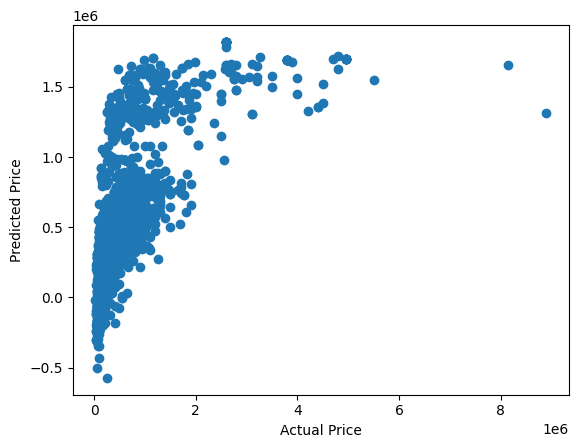

In [41]:
plt.scatter(y_train ,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [43]:
test_data_prediction = model.predict(x_test)

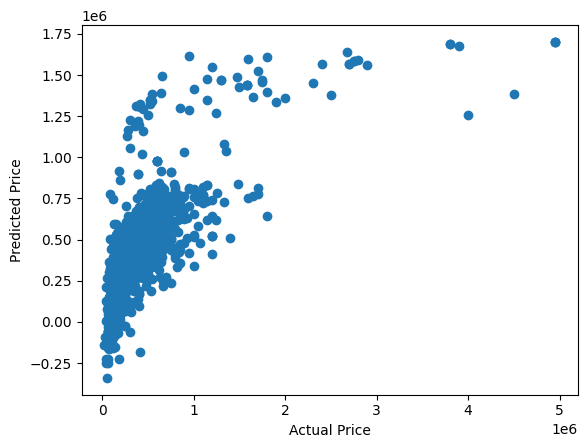

In [44]:
plt.scatter(y_test ,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [45]:
#Lasso Regression
lasso_model = Lasso()
lasso_model.fit(x_train ,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.250e+12, tolerance: 1.190e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [46]:
training_data_predict = lasso_model.predict(x_train)
lasso_model.score(x_train ,y_train)

0.44906535807777126

In [47]:
lasso_model.score(x_test ,y_test)

0.5022533600184873